In [1]:
import pandas as pd 
import scipy
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
X = df.iloc[:, :-1].values  # Convert to NumPy array
print(X[:5])
y = df.iloc[:, -1].values   # The last column (target)
print(y[:5])

[[6.000e+00 1.480e+02 7.200e+01 3.500e+01 0.000e+00 3.360e+01 6.270e-01
  5.000e+01]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 0.000e+00 2.660e+01 3.510e-01
  3.100e+01]
 [8.000e+00 1.830e+02 6.400e+01 0.000e+00 0.000e+00 2.330e+01 6.720e-01
  3.200e+01]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00
  3.300e+01]]
[1 0 1 0 1]


Glucose                     0.126302
BMI                         0.088849
Age                         0.059786
SkinThickness               0.058975
Insulin                     0.043649
Pregnancies                 0.012938
DiabetesPedigreeFunction    0.011936
BloodPressure               0.000000
dtype: float64


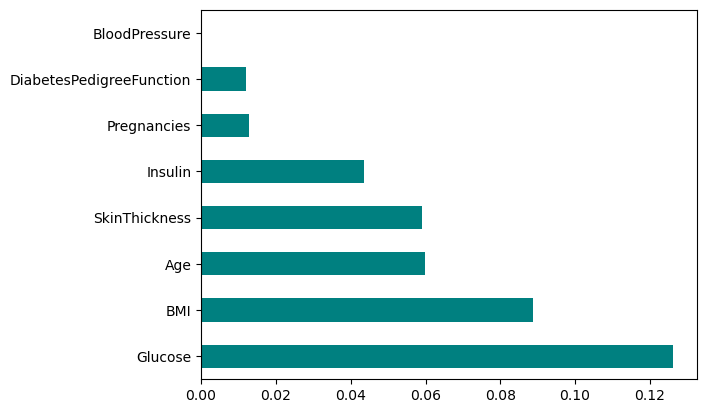

In [9]:
from sklearn.feature_selection import mutual_info_classif
mi_scores = mutual_info_classif(X, y)

mi_series = pd.Series(mi_scores, index=df.columns[0:len(df.columns)-1]).sort_values(ascending=False)

# Display MI scores
print(mi_series)
#feat_importances = pd.Series(importances, dataframe.columns[0:len(dataframe.columns)-1])
mi_series.plot(kind='barh', color = 'teal')
plt.show()

In [11]:
selected_features = mi_series[mi_series > 0.01].index.tolist()
print("Selected Features:", selected_features)

Selected Features: ['Glucose', 'BMI', 'Age', 'SkinThickness', 'Insulin', 'Pregnancies', 'DiabetesPedigreeFunction']


In [13]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier

# Initialize model
model = RandomForestClassifier()

# Perform Sequential Forward Selection (SFS)
sfs = SequentialFeatureSelector(model, n_features_to_select=5, direction="forward")
sfs.fit(X, y)

# Get selected features
cols=df.columns[0:len(df.columns)-1]
selected_features_sfs = cols[sfs.support_].tolist() #sfs.support_: Returns True for selected features, False for ignored ones.
print("Top 5 Features using SFS:", selected_features_sfs)

Top 5 Features using SFS: ['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'Age']


In [15]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Lasso for feature selection
lasso = Lasso(alpha=0.01)  # Adjust alpha for feature selection strength
lasso.fit(X_scaled, y)

# Get feature importance
lasso_importance = np.abs(lasso.coef_)

# Select features with non-zero importance
cols=df.columns[0:len(df.columns)-1]
selected_features = cols[lasso_importance > 0].tolist()

# Print results
print("Feature Importance (Lasso):", lasso_importance)
print("Selected Features:", selected_features)

Feature Importance (Lasso): [0.06275495 0.17781569 0.02785097 0.         0.00381567 0.09135973
 0.03872859 0.02449247]
Selected Features: ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
